In [1]:
#https://www.reneshbedre.com/blog/anova.html


import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")





In [2]:
df


,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [3]:
# reshape the d dataframe suitable for statsmodels package 

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [4]:
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [5]:
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [6]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


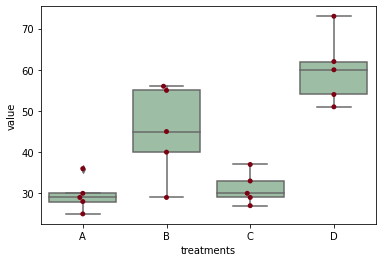

In [7]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()


In [8]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [10]:

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [ ]:

# output (ANOVA F and p value)
#                sum_sq    df         F    PR(>F)
#C(treatments)  3010.95   3.0  17.49281  0.000026
#Residual        918.00  16.0       NaN       NaN


In [13]:
!pip install bioinfokit


  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-py3-none-any.whl size=56028 sha256=f4dd66ce35fea6184c22fa4c941302ac30ca550a59feb6d336fe0437cdf7a4b3
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\1b\d6\92\20e4b1479eec88e4965412e8d97ad3b750d10d7cb7b0975da3
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=138e9c428cc372d28dd3dc845b605dec1a819551eb12cdbc72d6ceb1509d4b1a
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=18bd42191c51e766185cd2bdc119745c4b1be6d10986f43e755b05dce9c85643
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\82\e4\64\dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
Successfully built bioinfokit adjustText matplotlib-venn


In [14]:

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [ ]:
# output (ANOVA F and p value)
#                 df   sum_sq   mean_sq         F    PR(>F)
#C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
#Residual       16.0   918.00    57.375       NaN       NaN